# PROJETO TITANIC KAGGLE

### Este notebook é uma adaptação de soluções existentes, realizado para fins de estudos. A solução para este código foi realizada com base no livro [Data Science Solutions](https://www.amazon.com/Data-Science-Solutions-Startup-Workflow/dp/1520545312). 

Descrição

## 1) Importando o projeto

In [672]:
#Importação da biblioteca Kaggle
import kaggle


In [673]:
#Dentro da biblioteca Kaggle, importação do pacote de competição Titanic
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [674]:
#Importação da biblioteca zipfile, possibilitando extrair os arquivos titanic
import zipfile


In [675]:
#Comando de extração de arquivos
with zipfile.ZipFile("C:/Users/vinic/Documents/GitHub/KG_titanic/titanic.zip", 'r') as zip_ref:
    zip_ref.extractall("C:/Users/vinic/Documents/GitHub/KG_titanic/")

## 2) Breve contextualização do projeto 

ETAPAS QUE DEVEM SER APLICADAS (EM ORDEM OU NÃO)

1. Questionamento e definição de problemas;

2. Treinar e testar o DF;

3. Atribuir as téncicas de Data Wrangle, preparar e testar os dados;

4. Analizar, identificar insights e explorar a base de dados;

5. Definir o modelo preditivo e resolver o problema;

6. Aplicar técnicas de visualização de dados, apresentando os passos e a solução final;

7. Submeter os resultados.


Descrição do projeto ["Titanic Survival Competition".](https://www.kaggle.com/c/titanic)

Descrição dos dados ["Titanic Survival Competition - DATA".](https://www.kaggle.com/c/titanic/data)

>O projeto já apresenta um banco de dados para treino do algorítmo de modelo preditivo. Conhecendo esta base, contendo a lista de passageiros que sobreviveu ou não ao desastre do ticanic, o modelo deve determinar no banco de dados quem sobreviveu ou não.

**Informações**:
- On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
 - Em 15 de abril de 1912, durante sua viagem inalgural, o Titanic afundou-se após colidigr com um iceberg, matando 1502 dos 2224 passageiros e tripulação. Ou seja, uma taxa de sobrevivência em 32%;
- Um dos fatores primordiais para o elevado número de perdas de vidas foi a falta de botes e coletes salva-vidas.
- Embora houvesse algum elemento de sorte envolvido na sobrevivência do naufrágio, alguns grupos de pessoas tinham mais probabilidade de sobreviver do que outros, tais como mulheres, crianças, e a classe alta.
- Neste desafio, é solicito que seja construído um modelo preditivo que responda à pergunta: "que tipos de pessoas tinham mais probabilidades de sobreviver", utilizando dados sobre passageiros (ou seja, nome, idade, sexo, classe socioeconómica, etc.). 




## 3) Introdução

### 3.1)Importando Bibliotecas

In [676]:
# bibliotecas de análise e data wrangling
import pandas as pd
import numpy as np
import random as rnd

# bibliotecas de visualização de dados

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# bibliotecas de machine learning
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### 3.2) Aquisição de dados

A biblioteca Pandas foi utilizada para importar os dados e iniciar a tratativa destes.

In [677]:
#Como os arquivos de treino e de teste a serem aplicados neste projeto já foram pré definidos pelo banco de dados apresentado pelo Kaggle,
# os comandos abaixo permintem a leitura e atribuição de variáveis a bancos de dados de treino e de teste, em conformidade com as práticas de
# aplicabilidade em Machine Learning.
treino_bd = pd.read_csv(r'C:\Users\vinic\Documents\GitHub\KG_titanic\train.csv')
teste_bd = pd.read_csv(r'C:\Users\vinic\Documents\GitHub\KG_titanic\test.csv')
combine = [treino_bd, teste_bd]

### 3.3) Análise de dados prévia

Essa análise possibilita verificar o nome das colunas. Posteriormente as variáveis (colunas) devem ser avaliadas em variáveis qualitativas ou quantitativas.


In [678]:
#Verificação das variáveis do banco de dados de treino
treino_bd.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [679]:
#Verificação das variáveis do banco de dados de teste
teste_bd.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [680]:
treino_bd.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [681]:
teste_bd.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


Assim, é possível classificar as variáveis em:
 - Variáveis qualitativas nominais (atribuitiva ou binária):
    - PassengerId, Name, Ticket,  Survived, Sex, Cabin Embarked;
 - Variáveis qualitativas ordinais (ordenáveis, geralmente três ou mais categorias):
    - Pclass;
 - Variáveis quantitativas discretas (inteiros):
    - Age, SibSp, Parch.
 - Variáveis quantitativas contínuas (reais):
    - Fare.

#### Verificando se existem dados nulos

In [682]:
# Somar os valores nulos por variável
treino_bd.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [683]:
# Somar os valores nulos por variável
teste_bd.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [684]:
# tipologia dos dados, atribuiídos pela biblioteca Pandas
treino_bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [685]:
## Descrição em dados quantitativos
treino_bd.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Insighs iniciais

 - A amostra contém 891 observações. Representando 40% do número total de passageiros do Titanic (2.224);

 - Survived é uma categoria que varia entre 0 e 1;

 - Aproximadamente 38% das observações na amostra sobreviveram. Dentre os 2.224, 32% sobreviveram;

 - A maioria dos passageiros (>75%) não viajou com parentes ou filhos;



In [686]:
## Descrição em dados qualitativos
treino_bd.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Healy, Miss. Hanora ""Nora""",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


#### Premissas para análise de dados, considerando 'survival' como a variável alvo:

 - Correlações interessantes:
    1. Maiores de idade e sobrevivência;
    2. Relacionar embarcados com a sobrevivência;
    
 - Correções:
    1. Provavelmente a coluna Ticket apresenta uma quantidade muito elevada de valores duplicados (uma vez que é o valor da passagem). Como não apresenta uma relação com survival, receberá o comando drop.

    2. Cabin apresenta uma quantidade muito grande de valores null. Como não apresenta uma relação com survival, receberá o comando drop.

    3. PassengerId e Nome não contribui em nada para a interpretação ou para a variável survival, receberá o comando drop.

 - Criação:
   1. Criação de uma nova variável com o nome de 'Family', baseado em Parch e SibSp para obter a contagem total de familiares a bordo;
   2. Classificar e ordenar a variável Age e Fare, para análises.

 - Características dos dados:
   1. (Sex = female) onde a maioria sobreviveu;
   2. Crianças (age < ?) onde a maioria sobreviveu;
   3. Passageiros na primeira classe (Pclass = 1) onde a maioria sobreviveu;



## 4) Análise de Correlações

#### Para a validação das afirmações feitas, algumas análises adicionais de pivotagem podem ser consideradas





In [687]:
#Dentro do banco de dados de treino, são selecionadas as colunas 'Pclass' e 'Survived', agrupadas por 'Pclass', e classificadas
# em ordem crescente de acordo com a média agrupada para a variável 'Survived'. O mesmo é realizado para as linhas de código com as
# variáveis 'Sex' e 'Sibsp' e 'Parch'.
treino_bd[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [688]:
treino_bd[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [689]:
treino_bd[["SibSp","Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by= 'Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [690]:
treino_bd[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Logo, é possível afirmar que:
 - Pclass: existe uma relação significativa (>0.5) para a Pclass = 1;
 
 - Sex: Existe uma correlação muito forte para Sex = female, com 74%; 

 - SibSp e Parch: estes campos apresentam correlação zero para alguns itens, sendo assim, faz mais sentido trabalhar com esses dados de forma individual, categorizando-os.

### 4.1) Análise visual de dados



#### A análise visual possibilita realizar correlações visuais através de plotagem de gráficos e afins.

#### Um histograma possibilita verificar em qual setor (idade) estão concentradas a maior parclea de "survived = 0" e "survived = 1". Esta análise realiza uma correlação entre o fator de "Survived" e "Age", relacionando dados qualitativos e quantitativos.

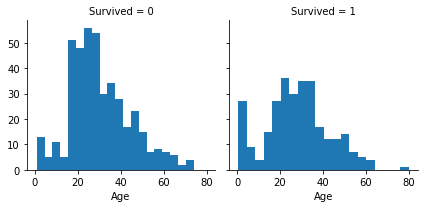

In [691]:
#  Plotagem de histograma, vindo da biblioteca seaborn. Relacionando "Survived" com "Age" e população da amostra
g = sns.FacetGrid(treino_bd, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Conclusões:
 - Crianças de até 4 anos apresentaram uma grande taxa de sobrevivência;
 - Os passageiros mais velhos (80+) sobreviveram;
 - A maior parte das pessoas que não sobreviveram tinham entre 15 e 25 anos.
 - A maior parte dos passageiros tinham entre 15 e 35 anos.

De forma análoga, foi feita uma correlação entre "Pclass" e "Survived":

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


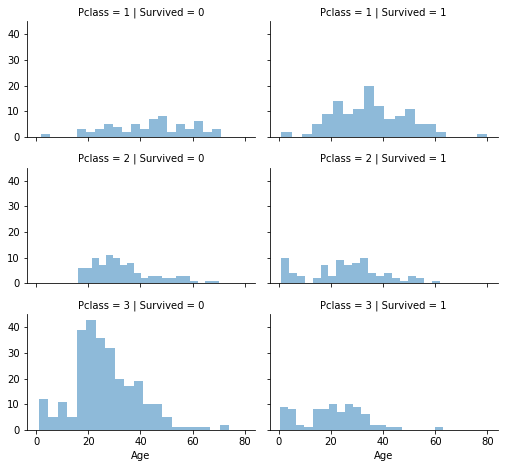

In [692]:
#  Plotagem de histograma, vindo da biblioteca seaborn. Relacionando "Survived" e "Pclass" com "Age" e população da amostra
grid = sns.FacetGrid(treino_bd, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Conclusões:
 - a terceira classe (Pclass = 3) apresentava a maior quantidades de passageiros, apresenta também a maior quantidade de passageiros que não sobreviveram;
 - a maior parte dos sobreviventes foram da primeira classe (Pclass = 1);
 - Pode-se considerar esta variável para treino do modelo.

De forma análoga, foi realizado o estudo para "survived" e "sex":

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


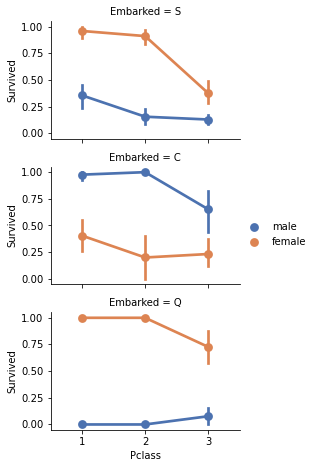

In [693]:
#  Plotagem de histograma, vindo da biblioteca seaborn. Relacionando "Embarked", "Survived" e população da amostra
grid = sns.FacetGrid(treino_bd, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

Conclusões:
 - Para os passageiros que embarcaram em 'S' e 'Q', a proporção de sobreviventes mulheres é maior;
 - Os passageiros da primeira classe tiveram maior taxa de sobrevivência;
 - Os homens que embarcaram em 'Q' tiveram maior taxa de sobevivência na terceira classe;
  - Devida a correlação, faz sentido adicionar 'sex' ao algorítmo de treino;
  


Realizando uma análise análoga em 'Fare', 'Embarked' e 'Sex'

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


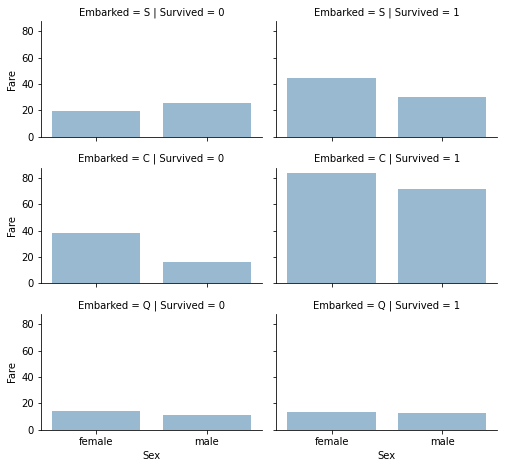

In [694]:
#  Plotagem de histograma, vindo da biblioteca seaborn. Relacionando "Embarked", "Fare" e "sex" com a população da amostra
grid = sns.FacetGrid(treino_bd, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

Conclusões:
 - Passageiros que pagaram mais caro, tiveram maior taxa de sobrevivência;
 

## 5) Data Wrangle

Com base nas decisões feitas nos tópicos acima, nesta etapa os dados teram suas primeiras manipulações.

### 5.1) Correção por 'Dropping', excluindo valores

In [695]:

print("ANTES", treino_bd.shape, teste_bd.shape, combine[0].shape, combine[1].shape)

treino_bd = treino_bd.drop(['Ticket', 'Cabin'], axis=1)
teste_bd = teste_bd.drop(['Ticket', 'Cabin'], axis=1)
combine = [treino_bd, teste_bd]

print("DEPOIS", treino_bd.shape, teste_bd.shape, combine[0].shape, combine[1].shape)


ANTES (891, 12) (418, 11) (891, 12) (418, 11)
DEPOIS (891, 10) (418, 9) (891, 10) (418, 9)


### 5.2) Criação e extração de valores com base nos dados existentes

A primeira análise deste tipo, vai avaliar o nome, possibilitando remover os Pronomes de tratamento, relacionando-os com a taxa de sobrevivência. Antes de remover as variáveis 'Name' e 'PassengerId' por 'Drop'.

O código aplicado, extrai o pronome de tratamento utilizando expressões regulares. O RegEx `(\w+\.)` busca o primeiro caractere identificado como ponto ' . ', extraindo o que vem antes. A parcela `expand = False` trás como produto um DataFrame.

In [696]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(treino_bd['Title'], treino_bd['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Assim, substitui-se os pronomes de tratamento pelos títulos mais comuns ou classificando-os como Raros (`Rare`):

In [697]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
treino_bd[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


É possível ainda converte-los em valores numéricos:


In [698]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

treino_bd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Agora, pode-se excluir as variáveis 'Name'e 'passengerId', preservando as informações relacionadas ao nome na coluna 'Title'.

In [699]:
treino_bd = treino_bd.drop(['Name', 'PassengerId'], axis=1)
teste_bd = teste_bd.drop(['Name'], axis=1)
combine = [treino_bd, teste_bd]
treino_bd.shape, teste_bd.shape

((891, 9), (418, 9))

In [700]:
treino_bd.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [701]:
teste_bd.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,1
1,893,3,female,47.0,1,0,7.0000,S,3
2,894,2,male,62.0,0,0,9.6875,Q,1
3,895,3,male,27.0,0,0,8.6625,S,1
4,896,3,female,22.0,1,1,12.2875,S,3


Convertendo variáveis STRING em valores Numéricos. Este é um pre requisito para a maioria dos algoritmos de machine learning realizarem as análises.

In [702]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

treino_bd.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### 5.3) Completando valores númericos com dados em Missing ou Null

Primeiro essa análise é feita para a variável relacionada à idade.
Dentre as possibilidades de análise, destacam-se:

 1. Gerar números randomicos dentro do intervalo da média e o desvio padrão;
 2. Realizar a substituição dos valores faltantes pela mediana relacionada à outras classes, a exemplo, ver a mediana para o sexo masculino na primeira classe, (Gender = 0 , Pclass = 1) e assim adiante.
 3. Combinar os métodos propostos 1 e 2, aplicando valores randomicos, entre a média e o desvio padrão, para cada um dos sexos dentro das classes.

 - O método 1 e 3, podem acrescentar valores sem aplicabilidade real, distorcendo a previsão esperada pelo algoritmo de ML. O método aplicado será o 2.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


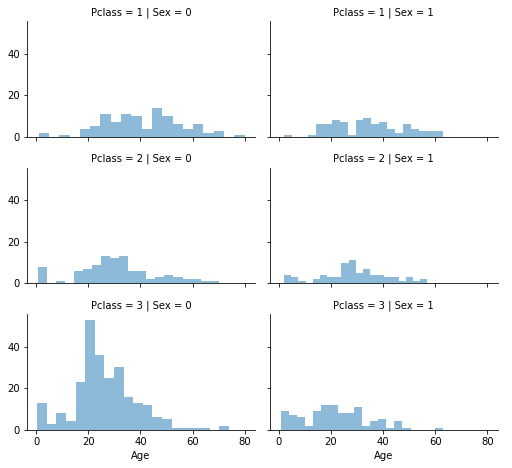

In [703]:
# Cenário atual
grid = sns.FacetGrid(treino_bd, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

O procedimento tem seu início com a inicialização de um array vazio, contendo uma estimativa de idades, baseado em combinações de Pclass x Sexo.

In [704]:
estimar_ages = np.zeros((2,3))
estimar_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [705]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            estimar_bd = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
      
            age_estimar = estimar_bd.median()
            estimar_ages[i,j] = int( age_estimar/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = estimar_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

treino_bd.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Com as iterações acima foi possível relacionar a variável Sex (0 ou 1) com Pclass (1,2,3) para calcular os valores estimados de idade (mediana) para as seis combinações possíveis: (0,1); (0,2); (0,3); (1,1); (1,2); (1,3).

Para esta análise, considerando que a variável 'Age' é uma variável quantitativa, esta é subdivida em categorias para determinar correlações com os sobreviventes. Posteriormente sendo excluida.

 - Entre 0 e 16 anos (Age = 0)
 - Entre 16 e 32 anos (Age = 1)
 - Entre 32 e 48 anos (Age = 2)
 - Entre 48 e 64 anos (Age = 3)
 - Maior que 64 anos (Age = 4)

In [706]:
treino_bd['AgeBand'] = pd.cut(treino_bd['Age'], 5)
treino_bd[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [707]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
treino_bd.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [708]:
treino_bd = treino_bd.drop(['AgeBand'], axis=1)
combine = [treino_bd, teste_bd]
treino_bd.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### 5.4) Completando valores númericos com dados em Missing ou Null




Com base nas varíaveis já existentes, o próximo passo, realiza uma correlação entre o tamanho da família (1 integrande + parceiros + familiares) e a taxa média de sobrevivência.

In [709]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

treino_bd[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# Por se tratar de duas variáveis quantitativas, é possível realizar a soma das mesmas, associando-as às taxas médias de sobrevivência.


,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


A vantagem de se realizar associações de variáveis como a realizada acima é a possibilidade de se excluir variáveis excessivas. Deixando o DF mais limpo.

Essa análise pode ser aprofundada, verificando a quantidade de pessoas que estavam sozinhas e sobreviveram

In [710]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

treino_bd[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()


,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Para esta análise, considera-se apenas a informação se o passageiro em questão estava sozinho ou não. Independendo do número de acompanhantes.

In [711]:
treino_bd = treino_bd.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
teste_bd = teste_bd.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [treino_bd, teste_bd]

treino_bd.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [712]:
# Esta parte do código foi excluída dos estudos, uma vez que busca-se evitar a ponderação arbitrária.

#for dataset in combine:
 #   dataset['Age*Class'] = dataset.Age * dataset.Pclass

#treino_bd.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

### 5.5) Categorizando variáveis qualitativas

Os valores contidos na variável "Embarked" são caracteres 'S','Q','C'. Porém, esta variável apresenta observações nulas, estea serão substituidas pelo caractere com maior frequência

In [713]:
freq_port = treino_bd.Embarked.dropna().mode()[0]
freq_port

'S'

In [714]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
treino_bd[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


Serão atribuídos números aos caracteres, para a "leitura" do algorítmo de ML, porém, por se tratar de uma variável qualitativa, estes números não terão valores atribuidos, são apenas representações:
 - S = 0
 - C = 1
 - Q = 2

In [715]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
treino_bd.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0,1,0
1,1,1,1,2,71.2833,1,3,0
2,1,3,1,1,7.9250,0,2,1
3,1,1,1,2,53.1000,0,3,0
4,0,3,0,2,8.0500,0,1,1


In [716]:
teste_bd['Fare'].fillna(teste_bd['Fare'].dropna().median(), inplace=True)
teste_bd.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,7.8292,2,1,1
1,893,3,1,2,7.0000,0,3,0
2,894,2,0,3,9.6875,2,1,1
3,895,3,0,1,8.6625,0,1,1
4,896,3,1,1,12.2875,0,3,0


In [717]:
treino_bd['FareBand'] = pd.qcut(treino_bd['Fare'], 4)
treino_bd[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [718]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

treino_bd = treino_bd.drop(['FareBand'], axis=1)
combine = [treino_bd, teste_bd]
   


In [719]:
#Banco de dados para treino:

treino_bd.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,0,1,0
1,1,1,1,2,3,1,3,0
2,1,3,1,1,1,0,2,1
3,1,1,1,2,3,0,3,0
4,0,3,0,2,1,0,1,1


In [720]:
#Banco de dados para teste:

teste_bd.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,3,1,2,1,1
3,895,3,0,1,1,0,1,1
4,896,3,1,1,1,0,3,0


## 6) Modelagem, Predição e Solução

Agora, os bancos de dados já estão em um formato compatível para o treino de um modelo (Algorítmo) de Machine Learning e para realizar a predição da solução proposta pelo Desafio Titanic.

Vale ressaltar que existem 60+ algorítmos de modelagem preditiva para se escolher. Este problema em específico é um problema de classificação e regreção. O objetivo é identificar a relação existente entre os dados de saída ('Survived or not') com as variáveis disponíveis ('Gender, Age, Port...'). Além disso, para este problema, o banco de dados já está disponível, tornando este um *Modelo Supervisionado de Machine Learning*.

Utilizando os critérios supracitados, definimos a tipologia dos algorítimos que devem ser aplicados: Algorítimos de Modelos Supervisionados de Machine Learning, com foco em Classificação e Regressão. Sendo isso, destacam-se:

 - Logistic Regression
 - KNN or k-Nearest Neighbors
 - Support Vector MAchines
 - Naive Bayes classifier
 - Decision Tree
 - Random Forrest
 - Perceptron
 - Artificial neural network
 - RVM or Relevance Vector Machine

Estes serão treinados e aplicados ao problema. O que apresentar melhores resultados com base no banco de dados de teste, será o definitivo.

Uma vez que as variáveis de treino e de teste já foram definidas, estas devem ser categorizadas em eixos, X_Treino, Y_Treino, X_teste. Os valores no eixo das absissas vão as entradas, enquanto no eixo das ordenadas, vão os produtos. A função gerada é o que o algorítmo vai identificar.

In [721]:
#Para os bancos de dados de treino, a opção "Survived" não é necessária (Será prevista com os valores teste)
#Para os bancos de dados de teste, a opção "PassengerId" não é necessária

X_treino = treino_bd.drop("Survived", axis=1)
Y_treino = treino_bd["Survived"]
X_teste  = teste_bd.drop("PassengerId", axis=1).copy()
X_treino.shape, Y_treino.shape, X_teste.shape

((891, 7), (891,), (418, 7))

### 6.1) Logistic Regression (Regressão Linear)

Dica de leitura para melhor compreensão:
 - [Gonzales,L](https://monografias.ufma.br/jspui/bitstream/123456789/3572/1/LEANDRO-GONZALEZ.pdf)
 - [Scikit-Learn](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

In [722]:
#help(LogisticRegression())
logreg = LogisticRegression()

In [723]:
logreg.fit(X_treino, Y_treino)
Y_prev1 = logreg.predict(X_teste)
acc_log = round(logreg.score(X_treino, Y_treino),2)
acc_log

0.81

In [724]:
acc_log * 100

81.0

Este valor acima, de 81.0 é o score obtido por este algorítmo de ML. Quanto mais próximo de 1, mais confiável ele é.

A Regressão Logística pode ser utilizada para validar suposições já feitas, a respeito de correlações. Desta forma, é criado um algorítmo de correlação, com base no algorítmo de regressão logística "logreg"

In [725]:
coeff_df = pd.DataFrame(treino_bd.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.193429
5,Title,0.408985
4,Embarked,0.282289
6,IsAlone,0.185954
3,Fare,-0.065545
2,Age,-0.564966
0,Pclass,-1.262582


Coeficiêntes positivos, aumentam a base logarítma (aumentando a probabilidade), de forma análoga, coeficiêntes negativos, decressem a base logarítma (decressendo a probabilidade).

Com base nisso, podemos aferir que:

 - A variável "Sex" é o maior coeficiente positivo verificado pela análise. Isso implique que, a medida que o valor desssa variável aumenta, assumindo "Male: 0 e Female: 1" (Masculino: 0 e Feminino: 1), a probabilidade de sobreviver "Survived = 1" aumenta mais;

 - De forma inversa, em relação à variável "Pclass", quanto mais esta aumenta, menor é a probabilidade de "Pclass".

 Esse raciocício se aplica a todas as variáveis estudadas em "treino_bd".

### 6.2) Support Vector Machines (Maquina de vetores de suporte)

Dica de leitura para melhor compreensão:
 - [Addan, D](https://www.inf.ufpr.br/dagoncalves/IA07.pdf)
 - [Scikit-learn](https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html)

In [726]:
#help(SVC())
svc = SVC()

In [727]:
# Support Vector Machines

svc = SVC()
svc.fit(X_treino, Y_treino)
Y_prev2 = svc.predict(X_teste)
acc_svc = round(svc.score(X_treino, Y_treino), 2)
acc_svc

0.83

In [728]:
print("O score deste algorítmo de ML é", acc_svc*100)

O score deste algorítmo de ML é 83.0


### 6.3) KNN ou k-Nearest Neighbors

Dica de leitura para melhor compreensão:
 - [Tussevana, M](https://aprenderdatascience.com/k-vizinhos-mais-proximos-knn/)
 - [Scikit-learn](https://scikit-learn.org/stable/modules/neighbors.html)

In [729]:
#help(KNeighborsClassifier())

In [730]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_treino, Y_treino)
Y_prev3 = knn.predict(X_treino)
acc_knn = round(knn.score(X_treino, Y_treino) , 2)
acc_knn

0.85

In [731]:
print("O score deste algorítmo de ML é", acc_knn*100)

O score deste algorítmo de ML é 85.0


### 6.4) Gaussian Naive Bayes

Dica de leitura para melhor compreensão:
 - [Koerich, Alessandro L.](http://www.eletrica.ufpr.br/ufpr2/professor/36/TE808/5-NaiveBayes-AM.pdf)
 - [Scikit-learn](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [732]:
# help(GaussianNB())

In [733]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_treino, Y_treino)
Y_prev4 = gaussian.predict(X_teste)
acc_gaussian = round(gaussian.score(X_treino, Y_treino), 2)
acc_gaussian

0.77

In [734]:
print("O score deste algorítmo de ML é", acc_gaussian *100)

O score deste algorítmo de ML é 77.0


### 6.5) Perceptron

Dica de leitura para melhor compreensão:
 - [Vicente, R](https://www.ime.usp.br/~rvicente/MachineLearning/W2_Perceptrons.pdf)
 - [Scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html#perceptron)

In [735]:
# help(Perceptron())

In [736]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_treino, Y_treino)
Y_prev5 = perceptron.predict(X_teste)
acc_perceptron = round(perceptron.score(X_treino, Y_treino), 2)
acc_perceptron

0.78

In [737]:
print("O score deste algorítmo de ML é", acc_perceptron *100)

O score deste algorítmo de ML é 78.0


### 6.6) Linear SVC

Derivado do Suport Vector Machines, porém em uma abordagem linear


In [738]:
# help(LinearSVC())

In [739]:
linear_svc = LinearSVC()
linear_svc.fit(X_treino, Y_treino)
Y_prev6 = linear_svc.predict(X_teste)
acc_linear_svc = round(linear_svc.score(X_treino, Y_treino), 2)
acc_linear_svc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8

In [740]:
print("O score deste algorítmo de ML é", acc_linear_svc *100)

O score deste algorítmo de ML é 80.0


### 6.7) Stochastic Gradient Descent

Dica de leitura para melhor compreensão:
 - [Ferreira, Eduardo V.](http://cursos.leg.ufpr.br/ML4all/slides/Gradiente_descendente.pdf)
 - [Scikit-learn](https://scikit-learn.org/stable/modules/sgd.html)

In [741]:
# help(SGDClassifier())

In [742]:

sgd = SGDClassifier()
sgd.fit(X_treino, Y_treino)
Y_prev7 = sgd.predict(X_teste)
acc_sgd = round(sgd.score(X_treino, Y_treino), 2)
acc_sgd

0.79

In [743]:
print("O score deste algorítmo de ML é", acc_sgd *100)

O score deste algorítmo de ML é 79.0


### 6.8) Decision Tree (Árvore de decisões)

Dica de leitura para melhor compreensão:
 - [Crepaldi, Paula. G](https://www.inesul.edu.br/revista/arquivos/arq-idvol_15_1320100263.pdf)
 - [Scikit-learn](https://scikit-learn.org/stable/modules/tree.html#tree)

In [744]:
#help(DecisionTreeClassifier())

In [745]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_treino, Y_treino)
Y_prev8 = decision_tree.predict(X_teste)
acc_decision_tree = round(decision_tree.score(X_treino, Y_treino) , 2)
acc_decision_tree

0.87

In [746]:
print("O score deste algorítmo de ML é", acc_decision_tree *100)

O score deste algorítmo de ML é 87.0


### 6.9) Random Forest (Floresta Randômica)

Dica de leitura para melhor compreensão:
 - [Crepaldi, Paula. G](https://www.inesul.edu.br/revista/arquivos/arq-idvol_15_1320100263.pdf)
 - [Scikit-learn](https://scikit-learn.org/stable/modules/tree.html#tree)

In [747]:
# help(RandomForestClassifier())

In [748]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_treino, Y_treino)
Y_prev9 = random_forest.predict(X_teste)
random_forest.score(X_treino, Y_treino)
acc_random_forest = round(random_forest.score(X_treino, Y_treino), 2)
acc_random_forest

0.87

In [749]:
print("O score deste algorítmo de ML é", acc_random_forest *100)

O score deste algorítmo de ML é 87.0


## 7) Finalização


### 7.1) Atribuição de valores aos modelos vistos

In [750]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.87
8,Decision Tree,0.87
1,KNN,0.85
0,Support Vector Machines,0.83
2,Logistic Regression,0.81
7,Linear SVC,0.80
6,Stochastic Gradient Decent,0.79
5,Perceptron,0.78
4,Naive Bayes,0.77


### 7.2) Submissão de solução

In [751]:
solucao = pd.DataFrame({
        "PassengerId": teste_bd["PassengerId"],
        "Survived": Y_prev
    })
solucao.to_csv('C:/Users/vinic/Documents/GitHub/KG_titanic/solucao_vgr2.csv', index=False)

In [752]:
#!kaggle competitions submit -c titanic -f solucao_vgr2.csv -m "https://github.com/viniciusgribas/KG_titanic"

